# Importing Libraries


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the csv file 

In [52]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Explore the data

In [53]:
train_data.info()
train_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

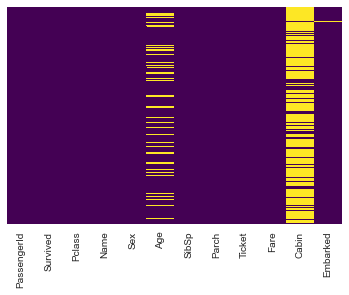

In [54]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False,cmap='viridis')

From the above description we can see that Cabin and Age columns have significant number of null values

## Survivors vs Non-Survivors

0    549
1    342
Name: Survived, dtype: int64


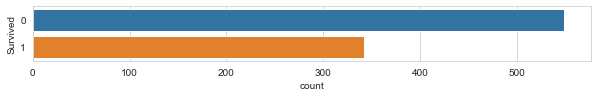

In [55]:
fig = plt.figure(figsize=(10,1))
sns.countplot(y='Survived', data=train_data)
print(train_data.Survived.value_counts())

## Gender distribution of Survivors

<AxesSubplot:xlabel='Survived', ylabel='count'>

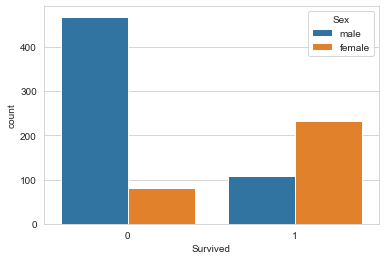

In [56]:
sns.countplot(x="Survived", hue = "Sex", data=train_data)

In [57]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women*100)

% of women who survived: 74.20382165605095


In [58]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men*100)


% of men who survived: 18.890814558058924


**With this we can see that only about 18% of men survived and about 75% of women survived**

## Class distribution:

<AxesSubplot:xlabel='Survived', ylabel='count'>

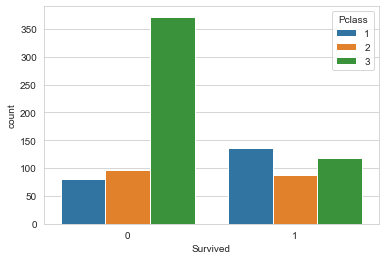

In [59]:
sns.set_style('whitegrid')
sns.countplot(x="Survived", hue="Pclass", data=train_data)

In [60]:
class1 = train_data.loc[train_data.Pclass == 1]["Survived"]
rate_class1 = sum(class1)/len(class1)
print("% of upper class survived: ", rate_class1*100)

% of upper class survived:  62.96296296296296


In [61]:
class2 = train_data.loc[train_data.Pclass == 2]["Survived"]
rate_class2 = sum(class2)/len(class2)
print("% of middle class survived: ", rate_class2*100)

% of middle class survived:  47.28260869565217


In [62]:
class3 = train_data.loc[train_data.Pclass == 3]["Survived"]
rate_class3 = sum(class3)/len(class3)
print("% of upper lower survived: ", rate_class3*100)

% of upper lower survived:  24.236252545824847


**From the above data we can see that the people of upper class has more chance of survivng than the people of lower class**

## Age distribution of passengers

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

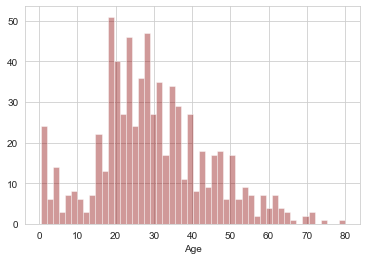

In [63]:
sns.distplot(train_data['Age'].dropna(), kde=False, color='darkred', bins=50)

## Age distribution of survivors

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

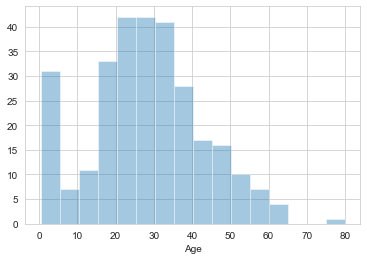

In [64]:
df = train_data.loc[train_data.Survived == 1]['Age']
sns.distplot(df.dropna(), kde=False)

In [65]:
Young = train_data.loc[train_data.Age <= 20]["Survived"]
rate_Young = sum(Young)/len(Young)
print("% of Young survived: ", rate_Young)

% of Young survived:  0.4581005586592179


In [66]:
Adult = train_data.loc[(train_data.Age >20) & (train_data.Age <= 40) ]["Survived"]
rate_Adult = sum(Adult)/len(Adult)
print("% of adult survived: ", rate_Adult)

% of adult survived:  0.3974025974025974


In [67]:
senior = train_data.loc[train_data.Age > 40]["Survived"]
rate_senior = sum(senior)/len(senior)
print("% of senior citizen survived: ", rate_senior)

% of senior citizen survived:  0.36666666666666664


In [68]:
print(sum(Young))
print(sum(Adult))
print(sum(senior))

82
153
55


In [69]:
df2 = train_data.loc[train_data.Pclass == 1]['Age']
print(df2.median())
print(df2.mean())

37.0
38.233440860215055


In [70]:
df3 = train_data.loc[train_data.Pclass == 2]['Age']
print(df3.median())
print(df3.mean())

29.0
29.87763005780347


In [71]:
df4 = train_data.loc[train_data.Pclass == 3]['Age']
print(df4.median())
print(df4.mean())


24.0
25.14061971830986


In [72]:
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

In [73]:
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
        
    else:
        return Age

In [74]:
train_data['Age'] = train_data[['Age','Pclass']].apply(fill_age, axis =1)
test_data['Age'] = test_data[['Age','Pclass']].apply(fill_age, axis =1)

<AxesSubplot:>

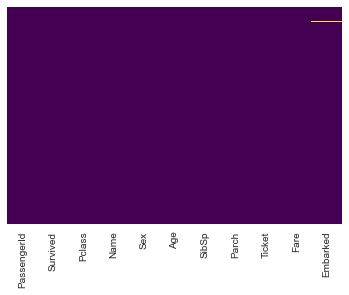

In [75]:
sns.heatmap(train_data.isnull(),yticklabels=False, cbar=False, cmap= 'viridis')

In [76]:
train_data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [77]:
# How many unique kinds of Ticket are there?
print("There are {} unique Ticket values.".format(len(train_data.Ticket.unique())))

There are 681 unique Ticket values.


In [78]:
train_data.drop(['Ticket', 'Fare', 'Name'], axis=1, inplace=True)
test_data.drop(['Ticket', 'Fare', 'Name'], axis=1,inplace=True)

In [79]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,male,34.5,0,0,Q
1,893,3,female,47.0,1,0,S
2,894,2,male,62.0,0,0,Q
3,895,3,male,27.0,0,0,S
4,896,3,female,22.0,1,1,S
...,...,...,...,...,...,...,...
413,1305,3,male,24.0,0,0,S
414,1306,1,female,39.0,0,0,C
415,1307,3,male,38.5,0,0,S
416,1308,3,male,24.0,0,0,S


In [80]:
train_data['Sex'] = np.where(train_data['Sex']=='female', 1,0)
test_data['Sex'] = np.where(test_data['Sex']=='female', 1,0)
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,0,22.0,1,0,S
1,2,1,1,1,38.0,1,0,C
2,3,1,3,1,26.0,0,0,S
3,4,1,1,1,35.0,1,0,S
4,5,0,3,0,35.0,0,0,S
...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,S
887,888,1,1,1,19.0,0,0,S
888,889,0,3,1,24.0,1,2,S
889,890,1,1,0,26.0,0,0,C


In [81]:
train_data.Embarked.isnull().sum()
train_data = train_data.dropna(subset=['Embarked'])
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,0,22.0,1,0,S
1,2,1,1,1,38.0,1,0,C
2,3,1,3,1,26.0,0,0,S
3,4,1,1,1,35.0,1,0,S
4,5,0,3,0,35.0,0,0,S
...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,S
887,888,1,1,1,19.0,0,0,S
888,889,0,3,1,24.0,1,2,S
889,890,1,1,0,26.0,0,0,C


In [82]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

train_data['Embarked'] = le.fit_transform(train_data['Embarked'])
test_data['Embarked'] = le.fit_transform(test_data['Embarked'])
print(le.classes_)

train_data.head()


['C' 'Q' 'S']


<ipython-input-82-2f99360dd08d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Embarked'] = le.fit_transform(train_data['Embarked'])


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,0,22.0,1,0,2
1,2,1,1,1,38.0,1,0,0
2,3,1,3,1,26.0,0,0,2
3,4,1,1,1,35.0,1,0,2
4,5,0,3,0,35.0,0,0,2


In [83]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,0,34.5,0,0,1
1,893,3,1,47.0,1,0,2
2,894,2,0,62.0,0,0,1
3,895,3,0,27.0,0,0,2
4,896,3,1,22.0,1,1,2
...,...,...,...,...,...,...,...
413,1305,3,0,24.0,0,0,2
414,1306,1,1,39.0,0,0,0
415,1307,3,0,38.5,0,0,2
416,1308,3,0,24.0,0,0,2


# LOGISTIC REGRESSION

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Y = train_data["Survived"]
X = train_data.drop("Survived", axis=1)

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state =42)


In [85]:
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, Y_train)

In [86]:
predictions = clf.predict(X_val)
from sklearn.metrics import accuracy_score
accuracy_score(Y_val, predictions)*100

79.7752808988764

In [87]:
test_data.isnull().sum()


PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [88]:
test_predictions = clf.predict(test_data)

In [89]:
Data = {"PassengerId":test_data["PassengerId"].values,
           "Survived": test_predictions}

In [90]:
Data

{'PassengerId': array([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,  902,
         903,  904,  905,  906,  907,  908,  909,  910,  911,  912,  913,
         914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
         925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
         936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
         947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
         958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
         969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
         980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
         991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
        1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
        1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
        1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
        1035, 1036, 103

In [91]:
output = pd.DataFrame(Data)

In [92]:
output.to_csv("solutionLR.csv", index = False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [93]:
from sklearn.ensemble import RandomForestClassifier

#y = train_data["Survived"]

#features = ["Pclass", "Sex", "SibSp", "Parch"]
#x = pd.get_dummies(train_data[features])
#x_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=1)
model.fit(X_train, Y_train)
predictions2 = model.predict(X_val)
print("Accuracy: ",accuracy_score(Y_val,predictions2)*100)



Accuracy:  82.02247191011236


In [94]:
test_predictions2 = model.predict(test_data)

In [95]:
output2 = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': test_predictions2})
output2.to_csv('solutionRF.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [96]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dt.fit(X_train, Y_train)
dt_pred_train = dt.predict(X_val)
print("Accuracy: ", accuracy_score(Y_val, dt_pred_train)*100)

Accuracy:  75.84269662921348


In [97]:
test_predictions3 = dt.predict(test_data)

In [98]:
output3 = pd.DataFrame({'PassengerId':test_data.PassengerId, 'Survived': test_predictions3})
output3.to_csv('solutionDT.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


From the above 3 algorithms, Random Forest algorithm gave the highest accuracy!